# Assignment Kennis en Data

## Notebook made by


|Naam|Studentnummer|
|-|-|
|Rico|secret|
|Sander|secret |
|Sam|secret |
|Agaath|secret |

## Peerreview

* Vul onderstaande dict/tabel in en run de cel. Klopt het? Zijn jullie het er allemaal mee eens?
    * Verander `1,2,3,4` door jullie studentnummers
    * `1: {1:.2,2:.3,3:.3,4:.2}` betekent dat student 1 zijn punt zo over de 4 studenten verdeelt
    * Let op, per student moeten de punten optellen tot 1!
    * De gegeven punten staan in de tabel op de rijen, de ontvangen punten in de kolommen.
    * met `cijfer_per_student` kan je bepalen welk cijfer ieder krijgt bij een gegeven groepscijfer.

## Toelichting

* De meeste opgaven worden automatisch nagekeken. Bij vrijwel alle opdrachten staan er een paar tests onder de opdracht, dit is voornamelijk om te zorgen dat je de juiste type output geeft. Dit zijn dus *NIET* alle tests, die komen er bij het graden nog bij.
* Elke vraag is 1 punt waard, tenzij anders aangegeven. Soms is die punt onderverdeeld in deelpunten, maar niet altijd. 

## Voor het inleveren!

* Pas niet de cellen aan, vooral niet die je niet kunt editen. Dit levert problemen op bij nakijken. Twijfel je of je per ongeluk iets hebt gewijzigd, kopieer dan bij inleveren je antwoorden naar een nieuw bestand, zodat het niet fout kan gaan.

* Zorg dat de code goed runt van boven naar beneden, verifieer dat door boven in Kernel -> Restart & Run All uit te voeren

## Na het inleveren!

* Het gebeurt erg vaak dat mensen een "leeg bestand" inleveren. Vaak een andere versie van de opgave die nog ergens op je computer rondslingerde. Zonde van al je werk toch!
* Dus, lever **minstens een half uur voor tijd in**. Download dan wat je hebt ingeleverd op Canvas. Geef het een andere naam om verwarring te voorkomen. En draai alle cellen, en bekijk het. Geen syntax fouten? Alle vragen gemaakt? Dan zit het vast wel goed, en hoef je niet in de zenuwen te zitten.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#RDF-plus-RDFS-conversion" data-toc-modified-id="RDF-plus-RDFS-conversion-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>RDF plus RDFS conversion</a></span><ul class="toc-item"><li><span><a href="#Vereisten" data-toc-modified-id="Vereisten-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Vereisten</a></span></li><li><span><a href="#Grading" data-toc-modified-id="Grading-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Grading</a></span></li></ul></li></ul></div>

# RDF plus RDFS conversion

* We will transform our family and LHBTI++ knowledge base into an RDF database and query it using SPARQL.
* The idea is that **you create this notebook as a tutorial on working with `rdflib`**.
* You will find many on the web, so search, watch and use the best what you can find to make a fun and top tutorial.

## Vereisten

1. `networkx2RDF(G)` takes any digraph G with additional node attributes and transform it to an RDF database.
2. Maak SPARQL queries voor al je gedefinieerde relaties. 
    * Check dat de antwoorden identiek zijn.
3. Download een andere triple store en maak daar juist een networkx graaf van (dat kan met rdflib), en bereken wat netwerk maten daarop.

## Grading

* Deze opdracht doen we met peergrading.
* Ieder groepje kijkt alle anderen en zichzelf na en geeft ieder groepje een deel van in totaal 100 te verdelen  punten.
* De eindscores transformeren we dan naar een cijfer tussen de 1 en 10. 

In [16]:
#!pip install rdflib
# See https://rdflib.readthedocs.io/en/stable/gettingstarted.html
from rdflib import Graph, Literal, URIRef, BNode
from rdflib.namespace import Namespace, RDF, FOAF
from rdflib.extras.external_graph_libs import rdflib_to_networkx_graph, rdflib_to_networkx_digraph,rdflib_to_networkx_multidigraph
import networkx as nx
import matplotlib.pyplot as plt
import statistics
import collections
%matplotlib inline

# Werken met RDFLib

RDF is een handige manier om informatie te representeren. RDFlib is een python library die het mogelijk maakt om met RDF te werken. Er wordt gewerkt met graphs, deze bestaan uit triples. De triples hebben de vorm van (Subject, Predicate, Object). RDF graphs kunnen van het internet worden gehaald of lokaal van de computer. Voor deze tutorial is het handig om enige basiskennis van Python, Kennis en Data en kennisgraven te hebben. Installeer de rdflib library met pip, en importeer het in een jupyter notebook.

We beginnen met de basis van RDFLib

In [3]:
# We beginnen met het aanmaken van onze eerste Graph
G = Graph()

# Vervolgens moeten we de Graph vullen met triples, dit kan op drie verschillende manieren
# 1. Er kan een triple store van het internet worden gehaald. Een triple store is een al bestaande Graph met triples
G.parse('http://dbpedia.org/resource/Michael_Jackson')

# 2. Er kan een triple store van een bestand op de computer worden gehaald. De parse functie heeft een tweede argument waar het bestandstype van de store kan worden gespecificeerd.
G.parse('C:\Users\Jante\Downloads\triplestore.nt', format='nt')

# 3. Je kan zelf triples toevoegen aan de Graph
# Er komen hierbij 3 node types kijken
# Er zijn de BNode & URIRef. Dit zijn de resources van een kennisgraaf. URIRef wordt gebruikt wanneer de URI van de node bekend is
# De Literal: Dit is een attribuut van een node. Het geeft bijvoorbeeld een naam of leeftijf aan
Jante = URIRef("http://FNWI.org/Jante")
Leeftijd = Literal(30)
G.add((Jante, FOAF.age, Leeftijd))

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (<ipython-input-3-04f664b0fc93>, line 9)

Gefeliciteerd! Je hebt nu je eerste kennisgraaf gemaakt.

Je zult je nu wel afvragen wat in bovenstaande cell FOAF.age betekend. Dit staat voor een RDF Schema. Het geeft het predicate tussen het subject en object aan.

Het is ook mogelijk om triples in een Graph te zoeken. We laten eerst een voorbeeld zien hoe je triples kan zoeken, vervolgens ben jij aan de beurt!
Voer de volgende opdracht uit:

1. Maak een RDF graph aan
2. Zoek een triple store URI van een bekend persoon
3. Zoek naar de triple die de naam aangeeft van het persoon.

In [12]:
# Op deze manier is het mogelijk om triples in een graph te zoeken.
for subject, predicate, object_ in G.triples():
    print(subject)

# Of gericht zoeken. None betekend dat dit alle waardes mag aannemen. FOAF.knows betekend dat alle triples die deze predicaat bezitten worden gezocht.
for s, p, o in G.triples((None, FOAF.knows, None)):
    print(s)

"""
Voorbeeld van een goed antwoord 
G = Graph()
G.parse('http://dbpedia.org/resource/Michael_Jackson')
for s,p,o in triples((None, FOAF.name, None)):
    print(s,p,o)

"""

KeyboardInterrupt: 

In [3]:
# Om te beginnen hebben we een lege DiGraph nodig om alle ouder-kind relaties aan toe te voegen 
# Die maak je door middel van een variabele zo aan:
N = nx.DiGraph()

# Vervolgens maken we twee variabelen aan, voor de kinderen en de ouders. Dit zijn twee lijsten met daarin lijsten van 
# alle kinderen en alle ouders.
kids = [['Friso', 'Nathan', 'Lucas'], ['Brigitta', 'Mirjam', 'Johan'], ['Nienke', 'Bente', 'Jasper', 'Wouter'], ['Anne'], ['Femmy', 'Pieter', 'Jack', 'Wim', 'Leo', 'JanH'], ['Patrick', 'Renate', 'Bianca'], ['Mirea', 'Sacha', 'Lynn'], ['Sita', 'Desi'], ['Gijs', 'Lisa'], ['Mick'], ['Lars', 'Sven'], ['Marijn'], ['Sander', 'Nathalie', 'Linda']]
ouders = [['Pieter', 'Brigitta'], ['Piet', 'Mien'], ['Jeanette', 'Johan'], ['Ge', 'Mirjam'], ['Geertruida', 'Theo'], ['Jack', 'Margaret'], ['JanH', 'Tanja'], ['Wim', 'Tamara'], ['Femmy', 'JanV'], ['Renate', 'Rick'], ['Bianca', 'Thomas'], ['Rolf', 'Sandrina'], ['Henry', 'Renee']]

# Door middel van deze "for-loop" worden er edges aangemaakt, respectievelijk tussen de ouders en hun kinderen
for i in range(len(ouders)):
    N.add_edges_from({(x, y) for x in ouders[i] for y in kids[i]})

# Met deze variabelen "m" en "v" worden respectievelijk aangeduid wie er mannen en vrouwen zijn binnen het netwerk
m = {'Friso', 'Nathan', 'Lucas', 'Pieter', 'Piet', 'Johan', 'Pieter', 'Jasper', 'Wouter', 'Ge', 'Theo', 'Jack', 'JanH', 'JanV', 'Wim', 'Leo', 'Patrick', 'Gijs', 'Rick', 'Thomas', 'Lars', 'Sven', 'Mick', 'Marijn', 'Sander', 'Rolf', 'Henry'}
v = {'Brigitta', 'Mien', 'Jeanette', 'Mirjam', 'Nienke', 'Bente', 'Anne', 'Geertruida', 'Margaret', 'Tanja', 'Femmy', 'Tamara', 'Renate', 'Bianca', 'Mirea', 'Sacha', 'Lynn', 'Sita', 'Desi', 'Lisa', 'Nathalie', 'Renee', 'Sandrina', 'Linda'}

# Dit zijn eigenlijk twee simpele for loops; kun jij bedenken wat deze for loops doen?
for n in m:
    N.nodes[n]['M']=True
    N.nodes[n]['V']=False
for n in v:
    N.nodes[n]['V']=True
    N.nodes[n]['M']=False
    
# Deze for loops zorgen ervoor dat alle personen die mannen zijn, daadwerkelijk worden aangeduid als mannen, en hetzelfde
# geldt voor vrouwen. Had je het goed?

In [5]:
# Dit wordt misschien al ietsje moeilijker. We gaan je stap voor stap meenemen in deze functie en wat hij allemaal doet
def Networkx2RDF(G):
    
    # Als eerst wordt er een lege Graph aangemaakt
    r = Graph()
    
    # Vervolgens gebruiken we Namespace uit de rdflib documentatie. Dit is erg handig om URl's aan te maken in een Namespace
    ex = Namespace("http://FNWIFamilieleden.com/")
    
    # Nu kunnen we deze handige "bind" gebruiken om een prefix te "binden" aan een Namespace URl
    # Door een Namespace aan de graaf te verbinden hoeven we straks met een SPARQL query geen Prefix te specificeren
    r.bind("RDF", RDF)
    r.bind('ex', ex)

    # hier voegen we de attributen van de nodes toe aan de triple store
    att = dict(G.nodes(data=True))
    for key,value in att.items():
        for k,v in att[key].items():
            k = k.replace('http://FNWIFamilieleden.com/', '')
            key = key.replace('http://FNWIFamilieleden.com/', '')
            if v == True and k == 'M':
                r.add((ex[key], RDF.type, ex.Male))
            elif v == True and k == 'V':
                r.add((ex[key], RDF.type, ex.Female))

    # Via deze for loop vullen we de subject, predicaat relatie, en object in; weet je nog wat dat zijn?
    for edge in G.edges:
        r.add((ex[str(edge[0]).replace('http://FNWIFamilieleden.com/', '')], ex.parent , ex[str(edge[1]).replace('http://FNWIFamilieleden.com/', '')]))

    # Dit stukje code zorgt ervoor dat de Graph wordt geprint in formaat van RDF turtle. ALs je niet weet dat dit is,
    # zoek dit dan even op.
    print(r.serialize(format='turtle').decode('utf-8'))
    
    # Met deze return, returnen we de Graph aan het einde van de functie
    return r

K = Networkx2RDF(N)

@prefix ex: <http://FNWIFamilieleden.com/> .

ex:Ge a ex:Male ;
    ex:parent ex:Anne .

ex:Geertruida a ex:Female ;
    ex:parent ex:Femmy,
        ex:Jack,
        ex:JanH,
        ex:Leo,
        ex:Pieter,
        ex:Wim .

ex:Henry a ex:Male ;
    ex:parent ex:Linda,
        ex:Nathalie,
        ex:Sander .

ex:JanV a ex:Male ;
    ex:parent ex:Gijs,
        ex:Lisa .

ex:Jeanette a ex:Female ;
    ex:parent ex:Bente,
        ex:Jasper,
        ex:Nienke,
        ex:Wouter .

ex:Margaret a ex:Female ;
    ex:parent ex:Bianca,
        ex:Patrick,
        ex:Renate .

ex:Mien a ex:Female ;
    ex:parent ex:Brigitta,
        ex:Johan,
        ex:Mirjam .

ex:Piet a ex:Male ;
    ex:parent ex:Brigitta,
        ex:Johan,
        ex:Mirjam .

ex:Renee a ex:Female ;
    ex:parent ex:Linda,
        ex:Nathalie,
        ex:Sander .

ex:Rick a ex:Male ;
    ex:parent ex:Mick .

ex:Rolf a ex:Male ;
    ex:parent ex:Marijn .

ex:Sandrina a ex:Female ;
    ex:parent ex:Marijn .

ex:Tamara a ex

In [6]:
Vader = K.query("""
    SELECT DISTINCT ?s WHERE{
        ?s ex:parent ?o .
        ?s RDF:type ex:Male .
    } 
""")
Moeder = K.query("""
    SELECT DISTINCT ?s WHERE{
        ?s ex:parent ?o .
        ?s RDF:type ex:Female .
    } 
""")
Zoon = K.query("""
    SELECT DISTINCT ?o WHERE{
        ?s ex:parent ?o .
        ?o RDF:type ex:Male .
    } 
""")
Dochter = K.query("""
    SELECT DISTINCT ?o WHERE{
        ?s ex:parent ?o .
        ?o RDF:type ex:Female
    } 
""")
Opa = K.query("""
    SELECT DISTINCT ?s WHERE{
        ?s ex:parent ?o .
        ?o ex:parent ?p .
        ?s RDF:type ex:Male .
    } 
""")
Oma = K.query("""
    SELECT DISTINCT ?s WHERE{
        ?s ex:parent ?o .
        ?o ex:parent ?p .
        ?s RDF:type ex:Female .
    } 
""")
Oom = K.query("""
    SELECT DISTINCT ?s WHERE{
        ?o ex:parent ?s .
        ?o ex:parent ?p .
        ?p ex:parent ?q .
        ?s RDF:type ex:Male .
    FILTER (?p != ?s)
    }
    
""")
Tante = K.query("""
    SELECT DISTINCT ?s WHERE{
        ?o ex:parent ?s .
        ?o ex:parent ?p .
        ?p ex:parent ?q .
        ?s RDF:type ex:Female .
    FILTER(?p != ?s)
    } 
    
""")
Broer = K.query("""
    SELECT DISTINCT ?s WHERE{
        ?o ex:parent ?s .
        ?o ex:parent ?p .
        ?s RDF:type ex:Male .
    FILTER(?s != ?p)
    }
    
""")
Zus = K.query("""
    SELECT DISTINCT ?s WHERE{
        ?o ex:parent ?s .
        ?o ex:parent ?p .
        ?s RDF:type ex:Female .
    FILTER(?s != ?p)
    }
    
""")
Neef = K.query("""
    SELECT DISTINCT ?r WHERE{
        ?o ex:parent ?s .
        ?o ex:parent ?p .
        ?p ex:parent ?q .
        ?s ex:parent ?r .
        ?r RDF:type ex:Male .
    FILTER(?p != ?s)
    } 
    
""")
Nicht = K.query("""
    SELECT DISTINCT ?r WHERE{
        ?o ex:parent ?s .
        ?o ex:parent ?p .
        ?p ex:parent ?q .
        ?s ex:parent ?r .
        ?r RDF:type ex:Female .
    FILTER(?p != ?s)
    } 
    
""")

True

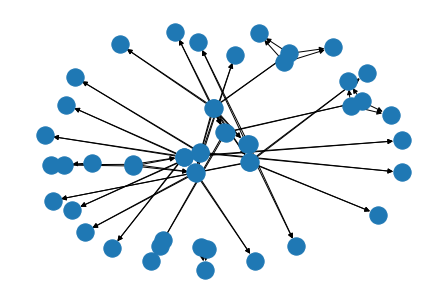

In [7]:
# Triple store naar Networkx graaf
def rdf_to_networkx(G):
    r = nx.DiGraph()
    attrs = list(G.triples((None, RDF.type, None)))
    edges = list(G.triples((None, None, None)))
    for s, p, o in [triple for triple in edges if triple not in attrs]:
        s = s.replace('http://FNWIFamilieleden.com/', '')
        o = o.replace('http://FNWIFamilieleden.com/', '')
        r.add_edge(s,o)
    
    for s, p, o in attrs:
        s = s.replace('http://FNWIFamilieleden.com/', '')
        o = o.replace('http://FNWIFamilieleden.com/', '')
        if o == 'Female':
            r.nodes[s]['M'] = False
            r.nodes[s]['V'] = True
        elif o == 'Male':
            r.nodes[s]['M'] = True
            r.nodes[s]['V'] = False
        else:
            r.nodes[s][p] = o
    
    nx.draw(r)
    return r


nx.is_isomorphic(rdf_to_networkx(K), N)

# Netwerk Analyse op RDF Graphs

Zoals we hierboven hebben gedaan voor ons eigen familie netwerk kun je ook een willekeurige RDF grafiek omzetten in een networkx graph. Binnen RDFlib is hier een heel handige functie voor die netwerk analyse op een RDFlib graph mogelijk maakt. We zullen dit doen in 3 stappen:

1. Een willekeurige RDF-grafiek in rdflib laden  
2. Converteer de rdflib Graph naar een networkx Graph, zoals hier getoond  
3. Krijg een netwerkanalyserapport door de algoritmen van networkx op die graph uit te voeren  

## 1. RDF laden

Het eerste wat we moeten doen, is de RDF-graph laden waarop we de netwerkanalyse willen uitvoeren. Door de volgende cel uit te voeren, wordt ons gevraagd het pad naar een RDF-grafiek in te vullen. Dit kan elk pad zijn, lokaal of online, dat we kunnen opzoeken. We kiezen er hier voor om een graph van het web te halen, een wikipediapagina(te vinden via https://dbpedia.org/fct/facet.vsp) over Jan van Leiden, er zijn op het web meerdere zoekmachines te vinden ook is het met RDFlib te werken.

In [9]:
#download rdf graph
rdf_graph=Graph()
url='https://dbpedia.org/data/John_of_Leiden.ttl'
result = rdf_graph.parse(url, format='turtle')

## 2 omzetten van de RDF file naar een netwerkx graaf.  
Dankzij de rdflib-ontwikkelaars is deze stap simpel,  er is namelijk een functie die rdflib omzet in zijn equivalent in networkx, eenvoudig he. Voer gewoon de volgende cel uit om onze RDF-dataset klaar te maken voor netwerkanalyse!(bedenk naar welke type graaf er wordt omgezet en kijk in de documentatie https://rdflib.readthedocs.io/en/stable/apidocs/rdflib.extras.html?highlight=external_graph_libs#rdflib.extras.external_graph_libs.rdflib_to_networkx_graph zijn er andere opties probeer gerust!)

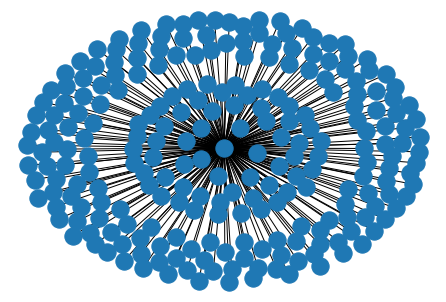

In [10]:
#transformeer naar een networkx graph
networkx_graph = rdflib_to_networkx_graph(rdf_graph)
nx.draw(networkx_graph)

## 3. Kennis en Data  
nu de RDF is omgezet naar een networkx graaf kunnen we er maten op berekenen, door gebruik te maken van de networkx algoritmes. In ons voorbeeld hebben we gekeken naar een complete wikipedia pagina en hebben we dus één connected component, als je een meer gedaileerde analyse wil doen zou je er dus voor kunnen kiezen om een subgraaf te maken van je de graaf in stap 2. En als we een andere graaf gegeneereerd hadden welke andere netwerkmaten had je dan kunnen bereken? Als je onderstaande cellen runt worden er een aantal maten berekend voor de huidige graaf. 

In [19]:
# Network measures
#degree
nx.degree(networkx_graph)

baptist theocracy, and proclaimed himself King of New Jerusalem in September 1534. The insurrection was suppressed in June 1535 after Prince-Bishop Franz von Waldeck besieged the city and captured John. John was tortured to death in the city's central marketplace on 22 January 1536, along with Bernhard Knipperdolling and Bernhard Krechting.", lang='en'): 1, rdflib.term.URIRef('http://fy.dbpedia.org/resource/Jan_fan_Leien'): 1, rdflib.term.URIRef('http://dbpedia.org/resource/Bernhard_Knipperdolling'): 1, rdflib.term.Literal(', Habsburg Netherlands', lang='en'): 1, rdflib.term.URIRef('http://dbpedia.org/resource/Polygamy'): 1, rdflib.term.URIRef('http://dbpedia.org/resource/Christoph_Waltz'): 1, rdflib.term.URIRef('http://dbpedia.org/resource/Mennonite_Church_in_the_Netherlands'): 1, rdflib.term.URIRef('http://dbpedia.org/resource/List_of_historical_opera_characters'): 1, rdflib.term.Literal('Giovanni di Leida (olandese: Jan van Leiden o Jan Beukelszoon, alias Johann Bockold; Leida, 1509

In [12]:
#degree centrality
nx.degree_centrality(networkx_graph)

como_Meyerbeer'): 0.004219409282700422,
 rdflib.term.URIRef('http://dbpedia.org/resource/Jan_of_Leiden'): 0.004219409282700422,
 rdflib.term.URIRef('http://dbpedia.org/resource/Le_prophète'): 0.004219409282700422,
 rdflib.term.URIRef('http://dbpedia.org/resource/Opera'): 0.004219409282700422,
 rdflib.term.Literal('ヤン・ファン・ライデン（Jan van Leiden、ヤン・ボッケソン（Jan Beukelszoon）とも、1509年 - 1536年1月22日）は、オランダ人の宗教家。16世紀の神聖ローマ帝国で発生したミュンスターの反乱の指導者の一人で、ミュンスターの王に即位して独自の千年王国を築こうとした。 ライデン出身。元々は仕立て屋をしていたが、1520年代にヤン・マティアスから成人洗礼を受けて再洗礼派の説教者となり1534年に市政府が再洗礼派の手に渡ったミュンスターに現われて人心を掌握し町を事実上の支配下におく。しかし、この地の支配者だった枢機卿はただちに軍を派遣しカトリックの軍隊により再洗礼派の指導者だったヤン・マティアスが1534年に殺されミュンスターは完全に包囲された。 これに対抗するために新エルサレムの王を名乗り、千年王国を築くために一夫多妻制、財産共同制などを導入、反抗する者は処刑という恐怖政治を施行するが、同時に包囲された市内では食料が不足して飢餓が襲いかかり市民は餓死していった。そしてついに軍隊が突入して逮捕された。他の首謀者2人とともに拷問後、処刑され遺骸は鉄の檻に入れられて、ラムベルティ教会の塔から吊るされた。', lang='ja'): 0.004219409282700422,
 rdflib.term.Literal('Jan van Leiden', lang='nl'): 0.004219409282700422,
 rdflib.term.URIRef('http://www.gameo.org/encyclopedia

In [13]:
#eccentricity
nx.eccentricity(networkx_graph)

tured John. John was tortured to death in the city's central marketplace on 22 January 1536, along with Bernhard Knipperdolling and Bernhard Krechting.", lang='en'): 2,
 rdflib.term.URIRef('http://fy.dbpedia.org/resource/Jan_fan_Leien'): 2,
 rdflib.term.URIRef('http://dbpedia.org/resource/Bernhard_Knipperdolling'): 2,
 rdflib.term.Literal(', Habsburg Netherlands', lang='en'): 2,
 rdflib.term.URIRef('http://dbpedia.org/resource/Polygamy'): 2,
 rdflib.term.URIRef('http://dbpedia.org/resource/Christoph_Waltz'): 2,
 rdflib.term.URIRef('http://dbpedia.org/resource/Mennonite_Church_in_the_Netherlands'): 2,
 rdflib.term.URIRef('http://dbpedia.org/resource/List_of_historical_opera_characters'): 2,
 rdflib.term.Literal('Giovanni di Leida (olandese: Jan van Leiden o Jan Beukelszoon, alias Johann Bockold; Leida, 1509 circa – Münster, 1536) è stato un capo anabattista proveniente dalla città olandese di Leida.', lang='it'): 2,
 rdflib.term.URIRef('http://dbpedia.org/resource/Polygamy_in_Christiani

In [14]:
#closeness centrality
nx.closeness_centrality(networkx_graph)

gemente. Då Münster fallit för de tyska landsfurstarnas belägring, torterades och avrättades Jan van Leiden. Hans öde är motiv för Giacomo Meyerbeers opera Profeten.', lang='sv'): 0.5010570824524313,
 rdflib.term.URIRef('http://dbpedia.org/resource/Template:ISBN'): 0.5010570824524313,
 rdflib.term.URIRef('http://dbpedia.org/resource/Giacomo_Meyerbeer'): 0.5010570824524313,
 rdflib.term.URIRef('http://dbpedia.org/resource/Jan_of_Leiden'): 0.5010570824524313,
 rdflib.term.URIRef('http://dbpedia.org/resource/Le_prophète'): 0.5010570824524313,
 rdflib.term.URIRef('http://dbpedia.org/resource/Opera'): 0.5010570824524313,
 rdflib.term.Literal('ヤン・ファン・ライデン（Jan van Leiden、ヤン・ボッケソン（Jan Beukelszoon）とも、1509年 - 1536年1月22日）は、オランダ人の宗教家。16世紀の神聖ローマ帝国で発生したミュンスターの反乱の指導者の一人で、ミュンスターの王に即位して独自の千年王国を築こうとした。 ライデン出身。元々は仕立て屋をしていたが、1520年代にヤン・マティアスから成人洗礼を受けて再洗礼派の説教者となり1534年に市政府が再洗礼派の手に渡ったミュンスターに現われて人心を掌握し町を事実上の支配下におく。しかし、この地の支配者だった枢機卿はただちに軍を派遣しカトリックの軍隊により再洗礼派の指導者だったヤン・マティアスが1534年に殺されミュンスターは完全に包囲された。 これに対抗するために新エル

In [0]:
#connected components
nx.connected_components(networkx_graph)

In [15]:
#density
nx.density(networkx_graph)

0.008438818565400843